# <font color="#0c2461">Data Science Project: Python foundations</font>

<font color="#3498db">Data analysis and modeling by: Karen Figueroa</font>

**Skills and Tools:** Univariate analysis, Bi-Variate analysis, Python, Missing Value Treatment, Exploratory Data Analysis ( Variable Identification)

## Context
#### The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables:

1. **Product** - The model no. of the treadmill. 
2. **Age** -  Age of the customer in no of years
3. **Gender** - Gender of the customer
4. **Education** - Education of the customer in no. of years
5. **Marital Status** - Marital status of the customer
6. **Usage** - Avg. # times the customer wants to use the treadmill every week
7. **Fitness** - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
8. **Income** - Income of the customer
9. **Miles** - Miles that a customer expects to run

## Objective

* Come up with a customer profile (characteristics of a customer) for the different products of the Cardio Good Fitness.
* Perform univariate and multivariate analysis
* Generate a set of insights and recommendations that will help the company in targeting new customers

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('pastel')

%matplotlib inline

### Importing the data
Importing the dataset and looking to the top and the bottom.

In [3]:
# Reading dataset
df = pd.read_csv('CardioGoodFitness.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


#### Observations 

* There are only 180 rows. 
* It appears that there's more male than females but we should look deeper into the respective analysis. 
* It also looks like the age range goes from 18 to 48, but we have tto look deeper into that as well. 

### Shape of the Dataset

In [4]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 180 rows and 9 columns.


### Columns of the Dataset

In [5]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

### Checking the missing data and the type of the data
Let's look if there are any missing data in our dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


* We can see there are no missing values which means that this is a clean dataset. Therefore we can jump to the univariate analysis. Additionally, the dataset contains 9 features. 3 of which are categorical and 6 which are numerical or ordinal.

In [7]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


* This outlines the ranges of values for the numerical features which we use later in our analysis. Nothing here suggests extreme outliers.

## Univariate analysis

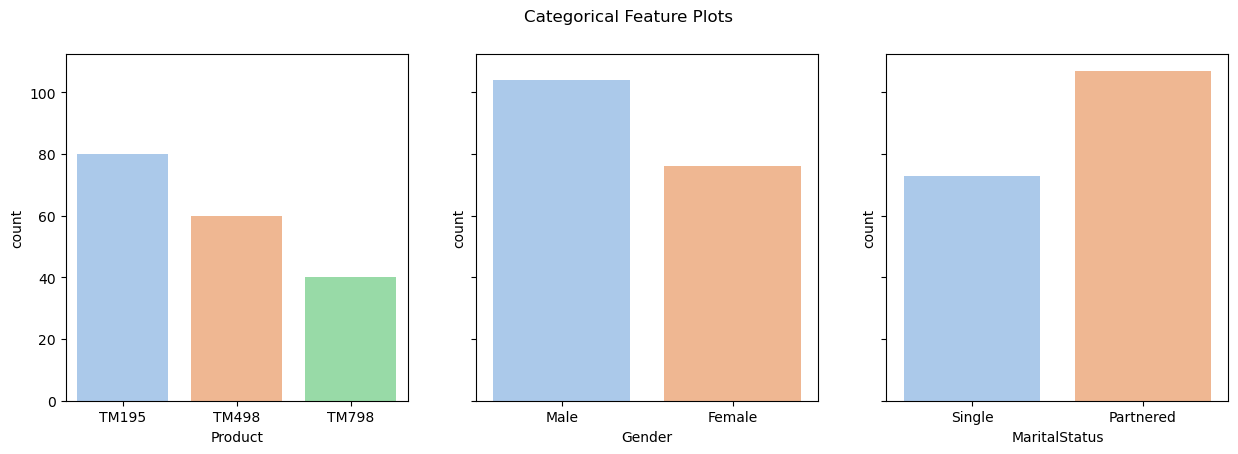

In [8]:
# Make a subplot for each of the categorical features

fig, axes = plt.subplots(1, 3, figsize=(15, 4.5), sharey=True)
fig.suptitle('Categorical Feature Plots')

cat_vars = ['Product', 'Gender', 'MaritalStatus']

i = 0
for var in cat_vars:
    sns.countplot(ax=axes[i], data=df, x=var)
    i += 1

### Insights
- **Product:** There are three different types of treadmills. TM195 has around 40%, TM498 30%, and TM798 has 20% of sales.
- **Gender:** More males buy our treadmills. The split is roughly 55% to 45% male to female. This is probably representative of the gender bias in sports.
- **MaritalStatus:** More partnered people buy our treadmills. The split is similar to gender, 55% to 45% partnered to single.

An interesting thing to note here is that gender is recorded even for partnered people and so we definitely want to analyze the single people separately as opposed to the person in a relationship who just so happened to execute the purchase.

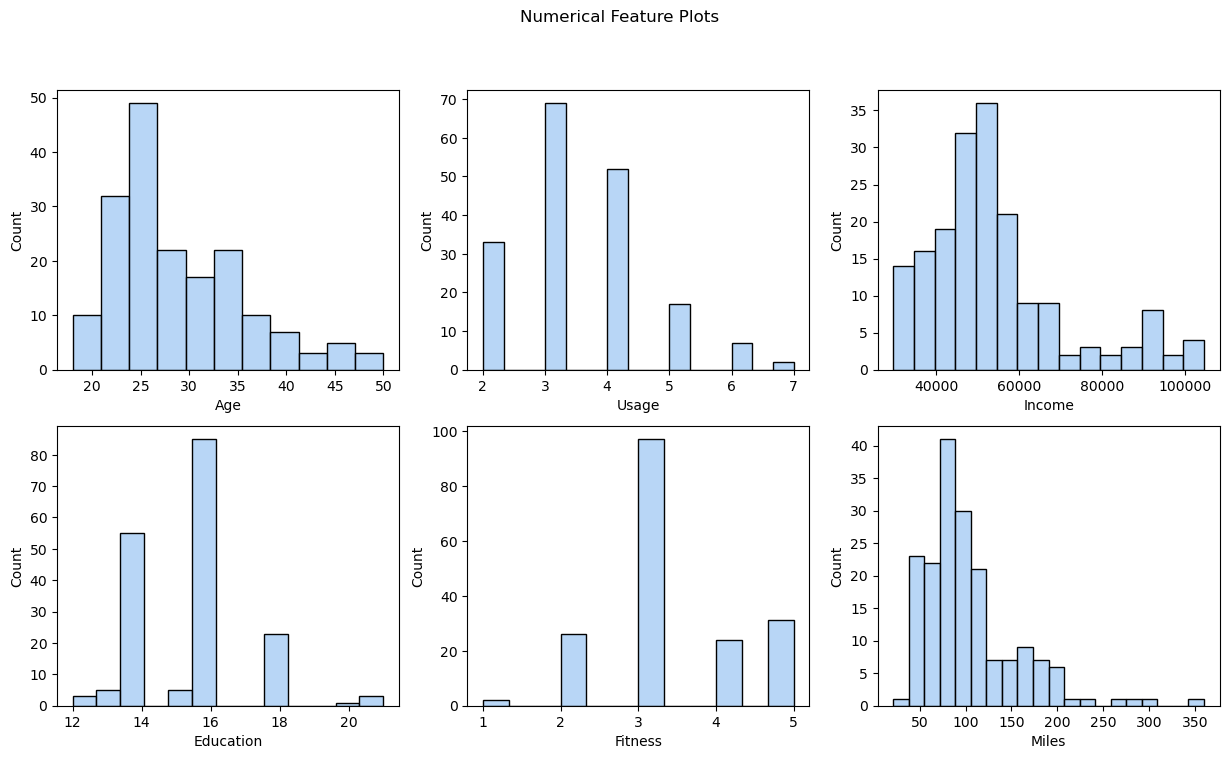

In [9]:
# Make a subplot for each of the numerical features split across multiple rows

rows = 2
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
fig.suptitle('Numerical Feature Plots')

numerical_vars = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

i = 0
j = 0

for var in numerical_vars:
    sns.histplot(ax=axes[i,j], data=df, x=var)
    i += 1
    
    if i >= rows:
        i = 0
        j += 1

### Insights

- **Age:** The range of our customers is from 18 to 50. It is centered around 25 and is skewed towards younger people. This is inline with expectations of the fitness industry.
- **Usage:** The modal usage is 3 times per week with no one wanting to use it less than 2 times per week. There is a sharp decrease for more than 4 times per week.
- **Income:** The average income of individuals have a mean income of \\$54,000 with very few making more than \\$100,000 which puts most of our customers in the middle class.
- **Education:** The counting of education years is unclear, but we will assume 14 years corresponds with an associate degree. This means nearly all of our customers finished their associate degree. A third only stopped at associate. Half have a bachelor's degree. The remaining sixth have more years of education. This roughly matches what we expect for the US.
- **Fitness:** By far, most people consider themselves in average shape. The only other insight is that very few people rate themselves as not very fit.
- **Miles:** Not much insight here, the bulk of the customers say they will do between 50 and 125 miles. For actionable insight, we will need to know on what time scale (miles every month, year, etc.) so we should ask the survey team what the scale was.

### Summary

The univariate analysis did not show any surprising outliers. Overall, it appears that our customers are fairly typical people. They are not elite athletes. They skew young and are middle class. While the univariate analysis helps us understand the general demographics, in order to make actionable items for our business, we need to analyze these with respect to our business. The only feature that contains business information is **Product** and so our multivariate analysis will focus on this feature. This way we can better understand how to target our customers with specific models.

## Multivariate Analysis

Text(0.5, 0.98, 'Heatmap - Variables correlation')

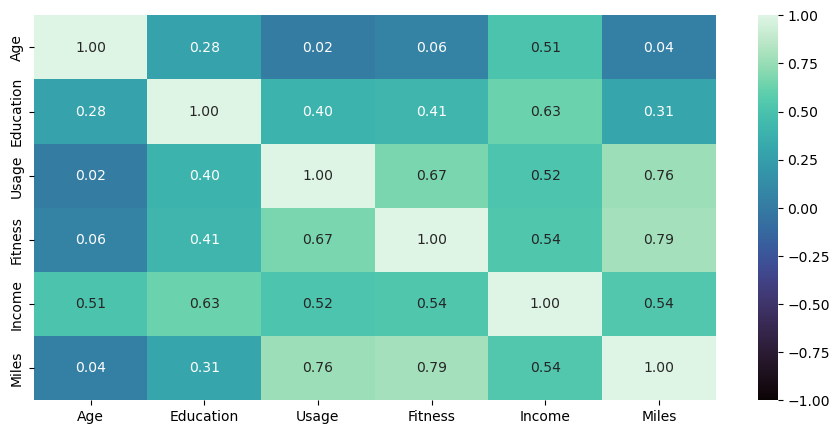

In [26]:
plt.figure(figsize=(11, 5))
sns.heatmap(df.corr(), vmin=-1, vmax=1,  annot=True, fmt=".2f", cmap="mako")
fig.suptitle('Heatmap - Variables correlation')

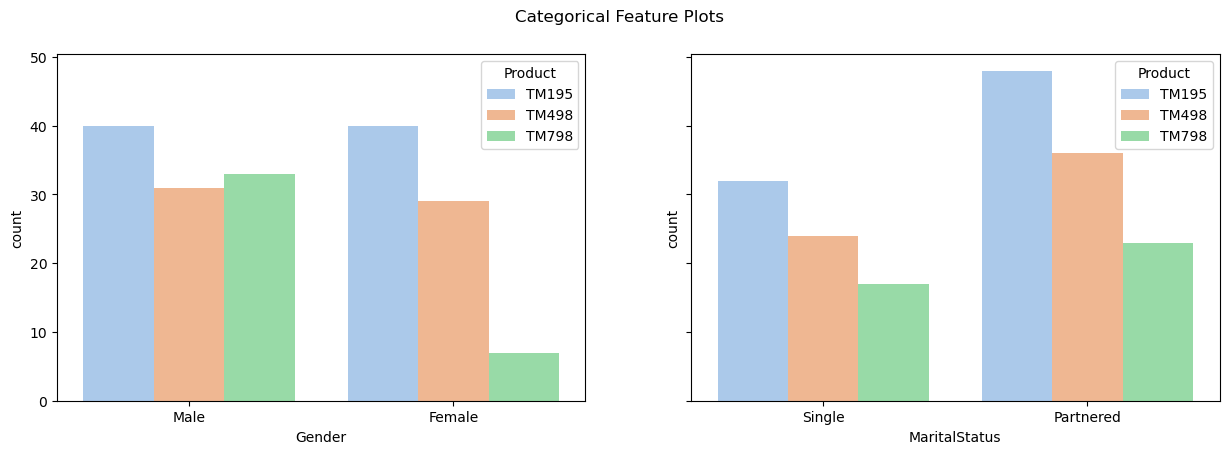

In [11]:
# Make a subplot for each of the categorical features split by Product

fig, axes = plt.subplots(1, 2, figsize=(15, 4.5), sharey=True)
fig.suptitle('Categorical Feature Plots')

cat_vars = ['Gender', 'MaritalStatus']

i = 0
for var in cat_vars:
    sns.countplot(ax=axes[i], data=df, x=var, hue='Product')
    i += 1

As we mentioned earlier, we want to separate the gender for the single people versus partenered people.

In [12]:
# Split dataset into single and couples datasets

mask = df['MaritalStatus'] == 'Single'

singles_df = df[mask]
couples_df = df[~mask]

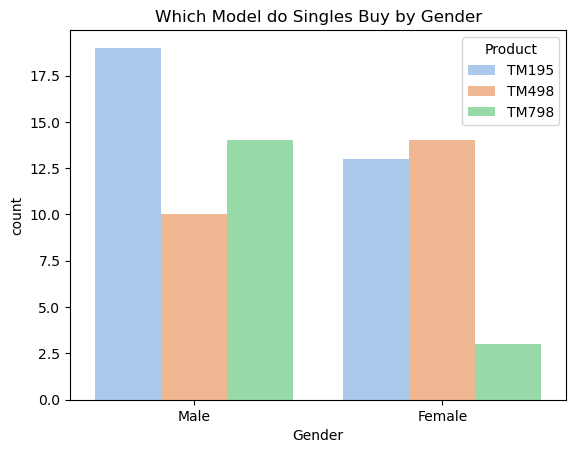

In [13]:
_ = sns.countplot(data=singles_df, x='Gender', hue='Product').set(title='Which Model do Singles Buy by Gender')

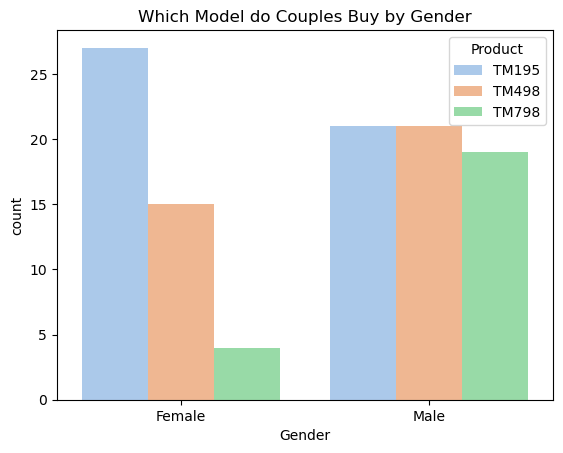

In [14]:
_ = sns.countplot(data=couples_df, x='Gender', hue='Product').set(title='Which Model do Couples Buy by Gender')

### Insights

**Note:** In everything that follows, we assume that a lower model number corresponds to a cheaper treadmill model for the sake of making our conclusions less verbose.

As we can see, after controlling for marital status, we get some pretty important insights. If we look at gender by itself, we would be led to believe that males buy all 3 models roughly equally and females favor the cheaper models. That is, the female customers are more price sensitive. However, after controlling for marital status, we see this trend reverses for single people. For singles, men tend to prefer either the cheapest model or the most expensive. For women, they tend to go for the low end or the medium model in equal proportion. When people are partnered, females vastly prefer the cheaper model and males buy all three models uniformly. This suggests that we want to target the male of partnered customers because they buy the more expensive model much more frequently. For the singles, we should investigate why females don't like the higher end model. This could be aethetics of the model, lack of features that female prefers (perhaps the medium model has a steeper incline), or even the placement of the treadmill in the store (the men's section).

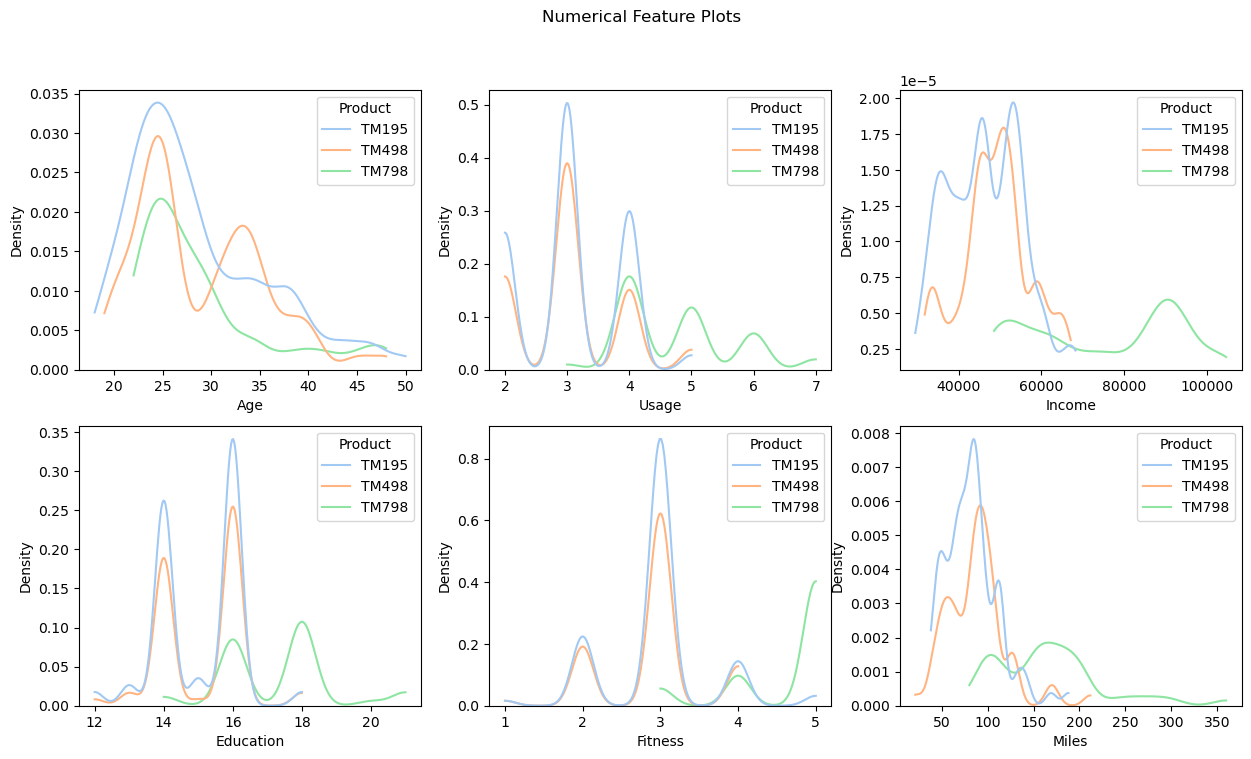

In [15]:
# Make a subplot for each of the numerical features split across multiple rows split by Product

rows = 2
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
fig.suptitle('Numerical Feature Plots')

numerical_vars = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

i = 0
j = 0

for var in numerical_vars:
    
    min_val = df[var].min()
    max_val = df[var].max()
    
    sns.kdeplot(ax=axes[i,j], data=df, x=var, hue='Product', cut=0, bw_adjust=0.5)
    i += 1
    
    if i >= rows:
        i = 0
        j += 1

### Insights

We immediately see that higher income individuals prefer the high end model. This is inline with expectations. We also see that higher fitness individuals (as per **Fitness**, **Usage**, and **Miles**) favor the high end model. Again, this matches that we expect more elite athletes prefer the high end model. Perhaps the most interesting relationship is that higher education is clearly correlated with the higher model. Higher education is obviously associated with higher income and this could explain this effect. But we should make sure that higher education is not confounded with fitness level. Apart from that, these plots suggest that there is no difference between the low end and medium grade model. The only significant difference is the income level where low incomes drastically prefer the cheaper model. There is a difference in the age plots as well, but this is correlated with higher income and so the explanatory power is solely in the income level.

In order to see whether or not education level is relevant or simply confounded with income, we need to analyze these variables jointly.

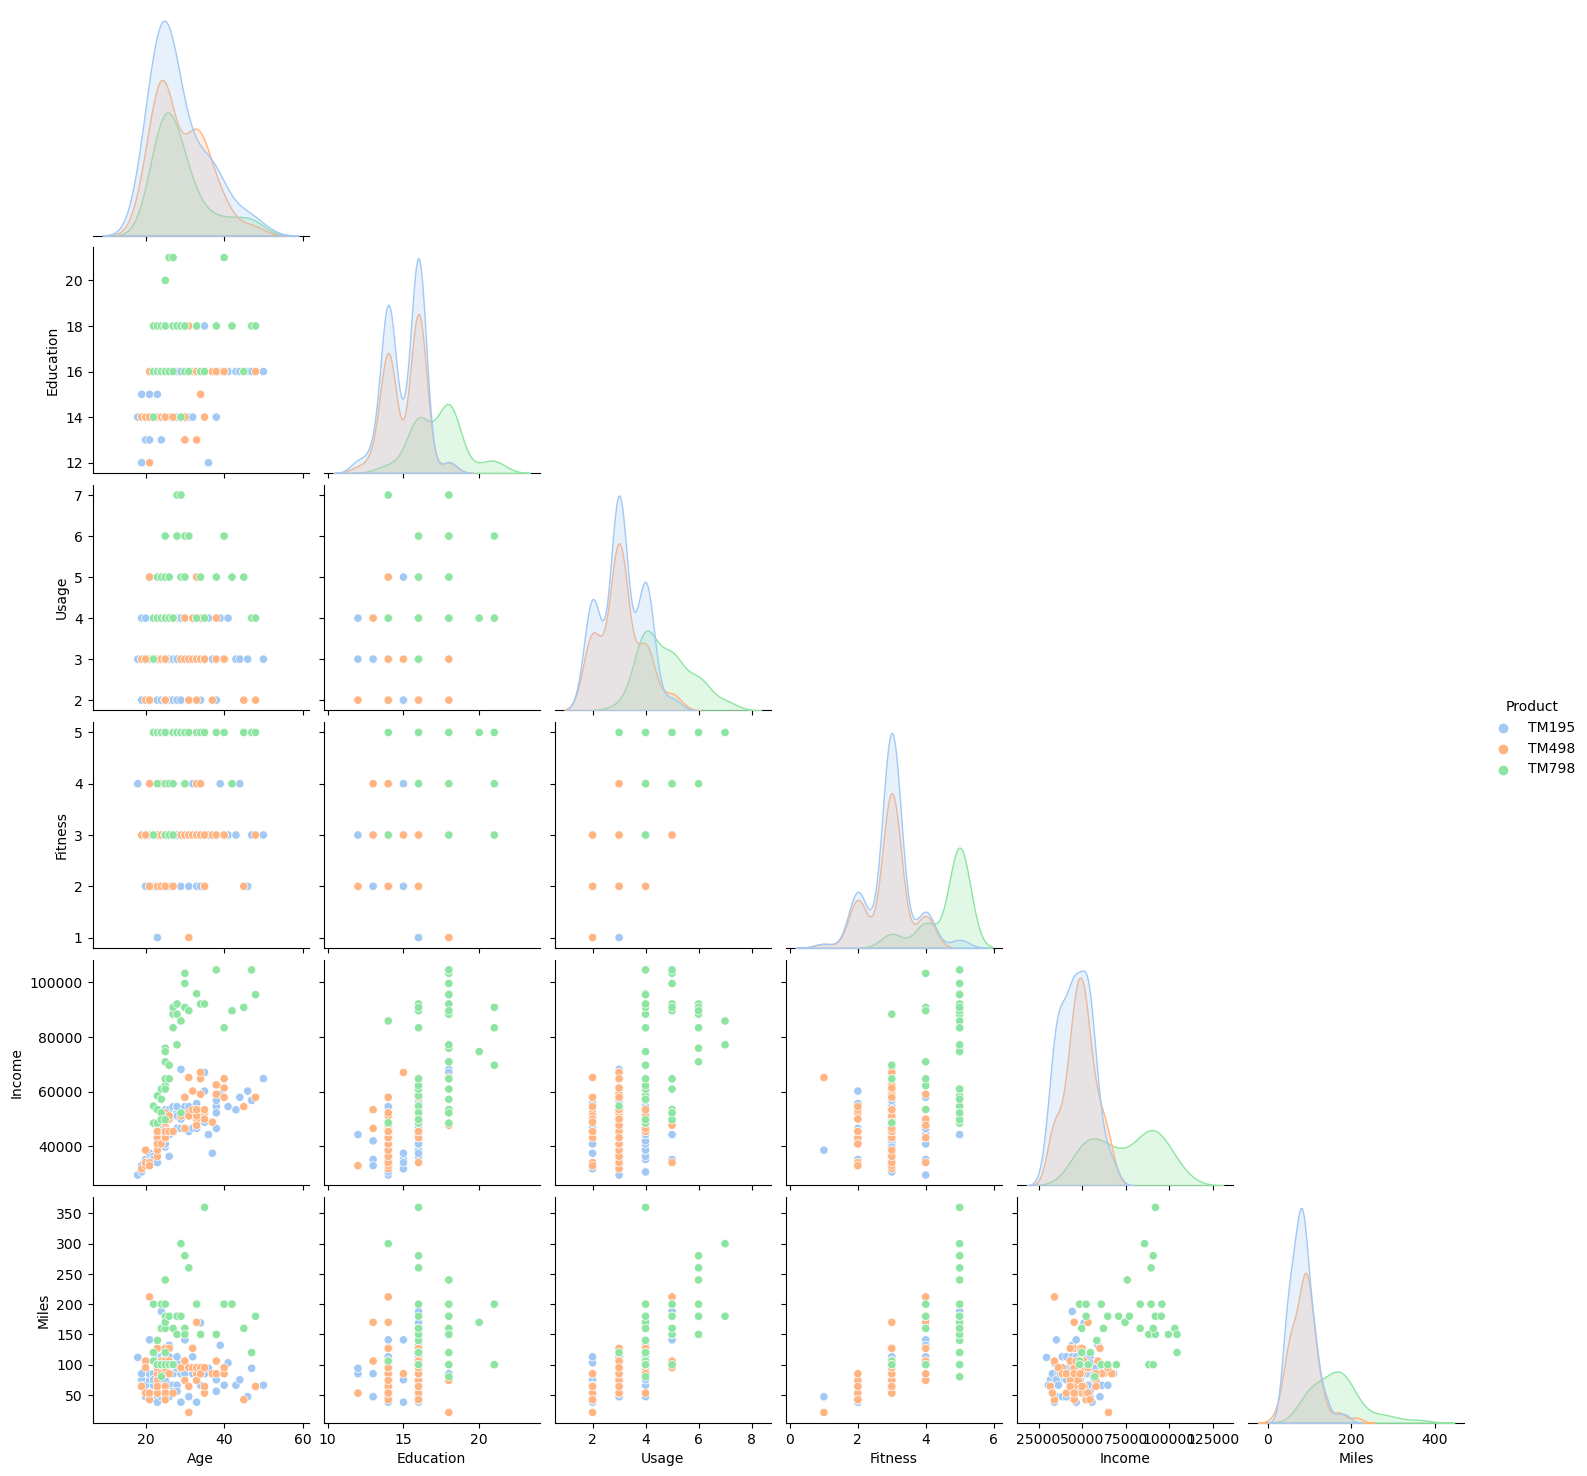

In [16]:
_ = sns.pairplot(df, hue='Product', corner=True)

Note, the diagonal are the same 6 plots as before with slightly different shapes. As expected, education is clearly linearly related with income level. We also get affirmation that age is related with income level which further shows that the only difference between the low and medium models is price sensitivity. The surprising thing we can see from this plot is that education level has a very slight relationship with perceived fitness level (**Fitness**, **Usage**, and **Miles**). This means that higher education levels not only can afford the higher end model but also perceive that they need it more than lower education levels. This is definitely an actionable insight and something our business can leverage to target a more lucrative customer set.

Finally, we revisit the gender to see if the difference in genders can be explained by differences in income levels due to the gender gap. The next plot is focused on singles.

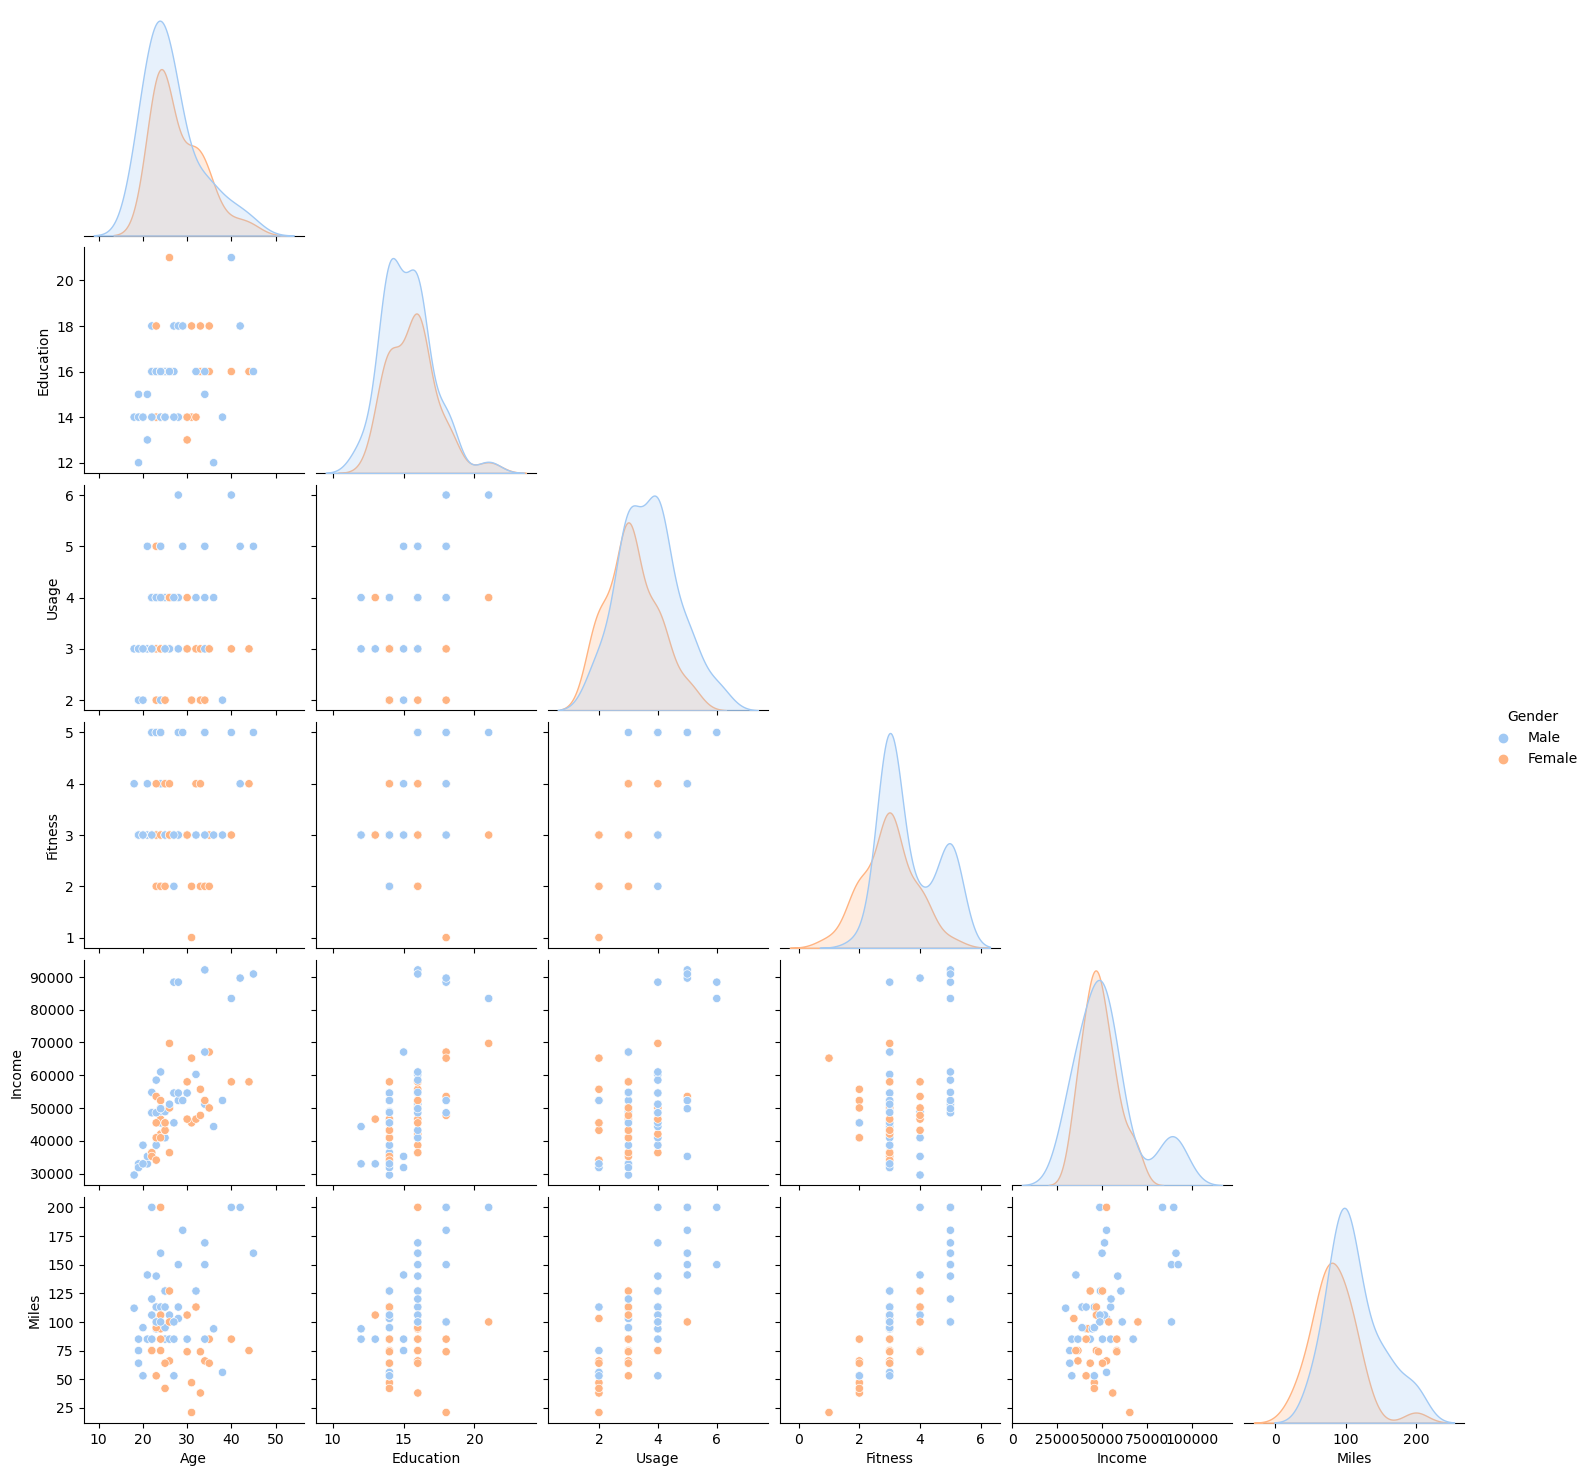

In [17]:
_ = sns.pairplot(singles_df, hue='Gender', corner=True)

<AxesSubplot: xlabel='Income', ylabel='Density'>

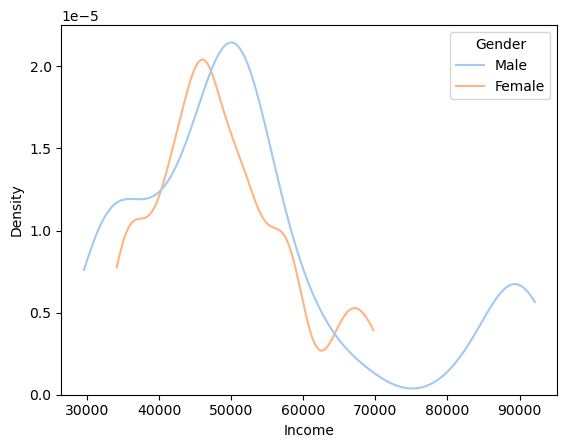

In [18]:
sns.kdeplot(data=singles_df, x='Income', hue='Gender', cut=0, bw_adjust=0.5)

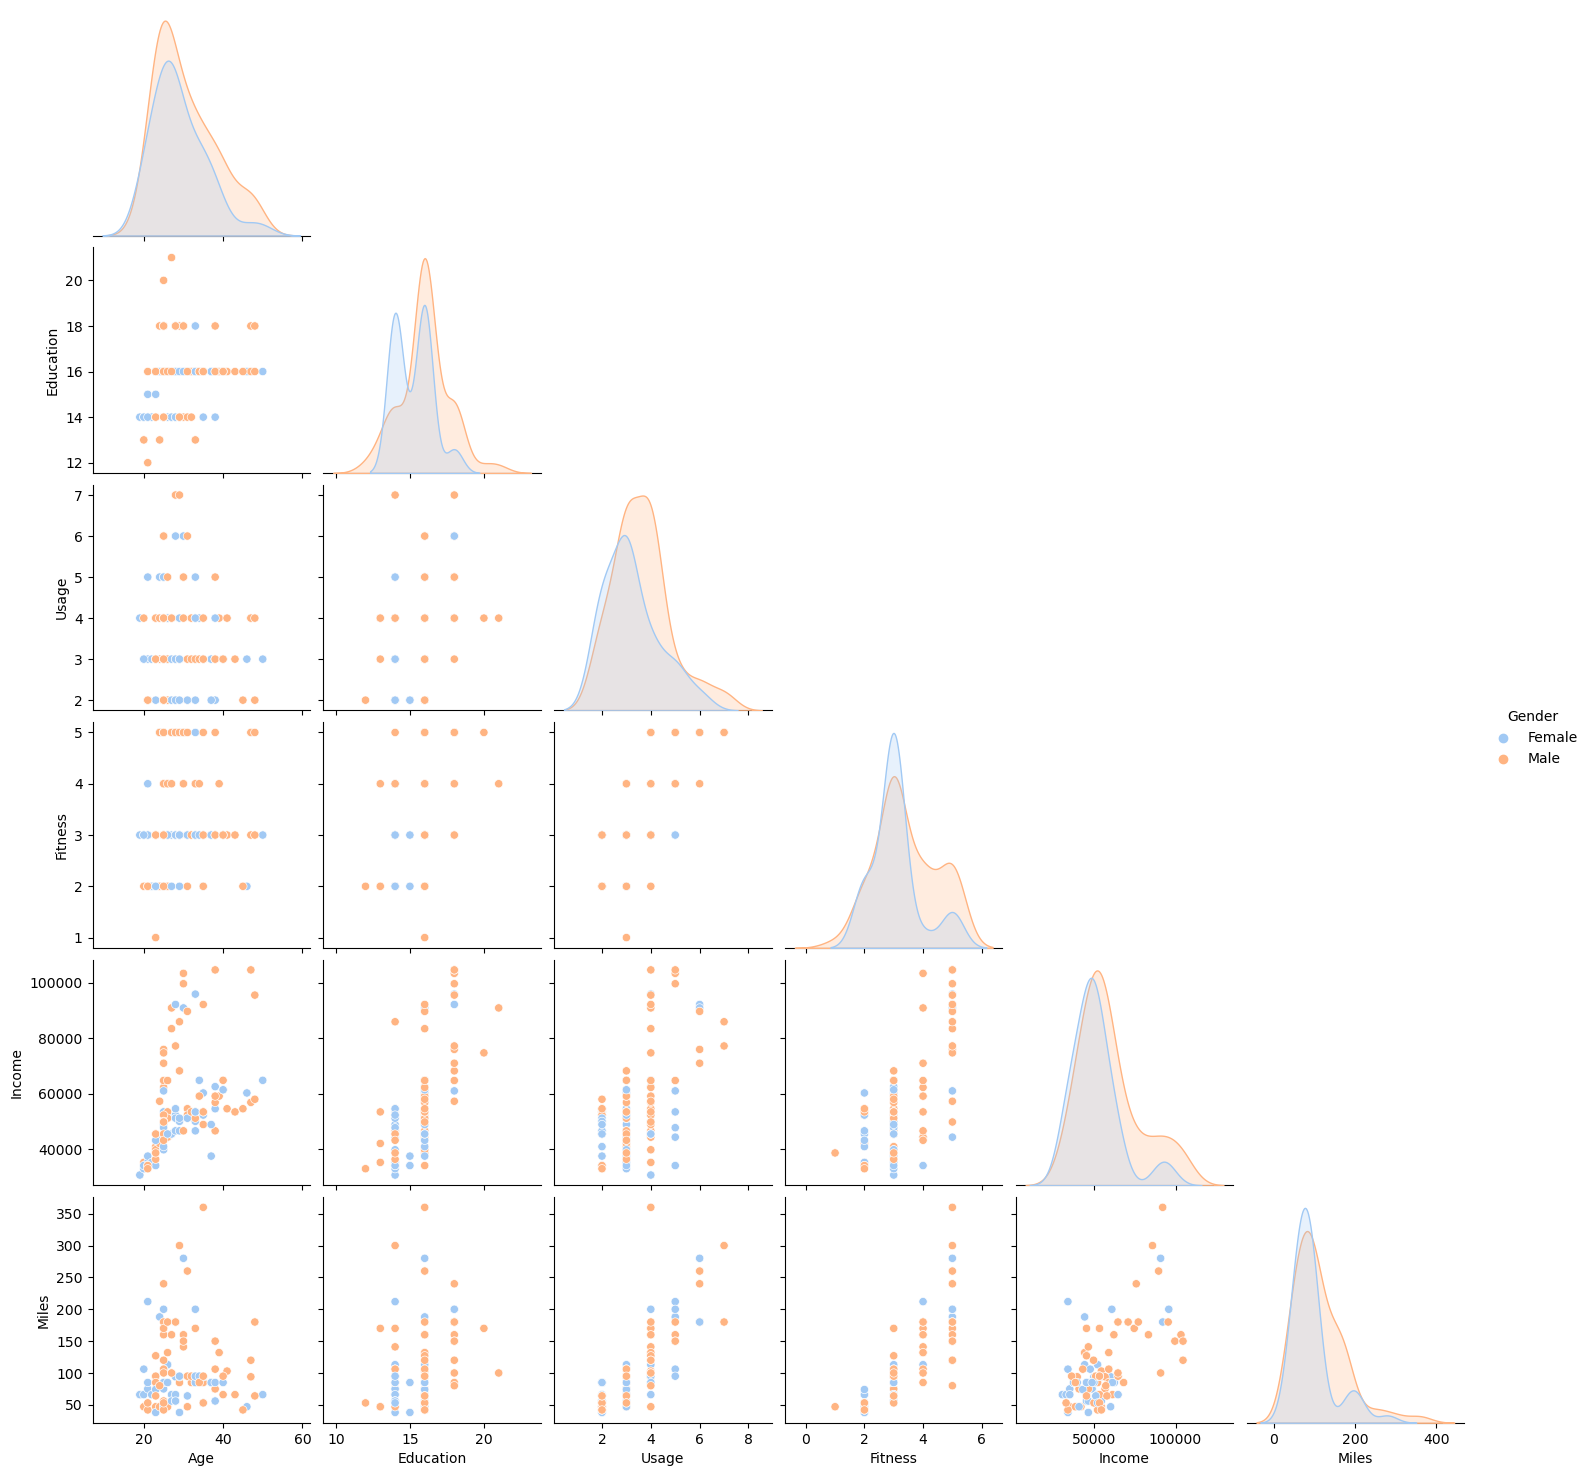

In [19]:
_ = sns.pairplot(couples_df, hue='Gender', corner=True)

### Insights

We actually do see that income is higher among single males than single females. The same relationship exists in couples but is much less pronounced and probably due to few data points as it does not match reality that a couple's income is dependent on which one pays for the treadmill. While it could be the case, it seems very unlikely. Thus, we takeaway from this that females are not more price sensitive than men but simply make less money across the spectrum.

## Conclusion and Recommendations

To summarize our analysis, we saw that our customer base is fairly typical of an average young American. We definitely do not skew to heavily towards one niche. That being said, couples do represent a majority of our customers and we did see that when the male part of the partner buys the treadmill, they tend to go for the more expensive model. For singles, we saw that there might be a bias for females as they do not tend to buy the higher end model. But further analysis showed that this is explained by their lower income levels and most likely not due to some innate dislike to the higher end model. Furthermore, we saw that perceived fitness amongst higher educated people tends to be higher and so they desire the higher end model which is synergistic with their higher levels of incomes. For the lower and medium tier treadmills, the main difference in units sold is simply income levels. Thus we have the following recommendations:
1. Target the male component of a couple (either via ads or salespeople insisting them be present) to increase the likelihood of upgrading to the higher end model
2. The most lucrative customer to us is highly educated people as they have more income and perceive themselves to need more elite equipment. This makes the higher end model easier to sell.
3. Differentiate the lower and mid level treadmills so that they become more correlated with fitness level to allow lower income individuals to justify the upgrade. Right now, it appears the medium tier only has extra nice-to-haves that are not essential but are valued if the income is sufficient.